In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
df_taxi = pd.read_csv('results/taxi_pickup.csv')
df_fhv = pd.read_csv('results/fhv_pickup.csv')

In [4]:
df_all = pd.concat([df_taxi, df_fhv], axis=0)
df_all.head()

,type,pu_month,pu_day,pu_hour,pulocationid,trips
0,green,1,1,0,106,1
1,green,1,1,0,112,18
2,green,1,1,0,116,19
3,green,1,1,0,119,4
4,green,1,1,0,122,2


In [5]:
df_all.shape

(1593676, 6)

In [6]:
#upload the shapefile; The 'location_i' column consists of all taxi zones within NYC + Newark airport
gdf_taxizone = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
gdf_taxizone.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [7]:
df_lockdown = df_all[((df_all['pu_month'] == 3) & (df_all['pu_day'] >= 23)) | ((df_all['pu_month'] == 4) & (df_all['pu_day'] <= 5))]
df_lockdown.head()

,type,pu_month,pu_day,pu_hour,pulocationid,trips
186819,green,3,23,0,129,1
186820,green,3,23,0,166,1
186821,green,3,23,0,244,1
186822,green,3,23,0,260,2
186823,green,3,23,0,29,1


In [8]:
df_lockdown_agg = df_lockdown.groupby(['pulocationid']).agg({'trips': 'sum'})
df_lockdown_agg['trips'] = df_lockdown_agg['trips'] / 14
df_lockdown_agg.head()

,trips
pulocationid,
1,3.142857
2,0.285714
3,528.357143
4,382.142857
5,40.142857


In [9]:
gdf_viz = gdf_taxizone.merge(df_lockdown_agg, left_on='location_i', right_on='pulocationid')
gdf_viz.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,trips
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",3.142857
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",0.285714
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",528.357143
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",382.142857
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",40.142857


<AxesSubplot:>

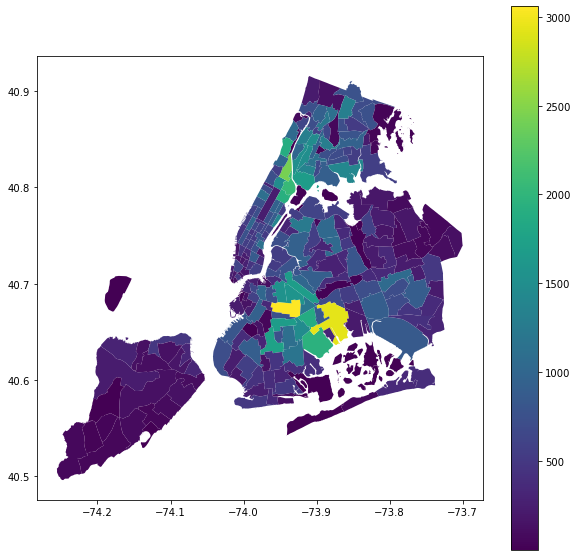

In [11]:
gdf_viz.plot(figsize=(10,10), column='trips', legend=True)

In [12]:
df_before_lockdown = df_all[(df_all['pu_month'] == 3) & (df_all['pu_day'] < 16)]
df_before_lockdown['trips'] = df_before_lockdown['trips'] / 15 # daily average
df_before_lockdown.head()

<ipython-input-12-48ec870e560e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_lockdown['trips'] = df_before_lockdown['trips'] / 15 # daily average


,type,pu_month,pu_day,pu_hour,pulocationid,trips
143369,green,3,1,0,10,0.066667
143370,green,3,1,0,106,0.133333
143371,green,3,1,0,108,0.066667
143372,green,3,1,0,112,1.066667
143373,green,3,1,0,116,0.266667


In [13]:
df_before_lockdown_agg = df_before_lockdown.groupby(['pulocationid']).agg({'trips': 'sum'})
df_before_lockdown_agg.head()

,trips
pulocationid,
1,83.466667
2,1.200000
3,1584.466667
4,2998.866667
5,171.066667


In [14]:
gdf_viz_before = gdf_taxizone.merge(df_before_lockdown_agg, left_on='location_i', right_on='pulocationid')
gdf_viz_before.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,trips
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",83.466667
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",1.200000
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",1584.466667
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",2998.866667
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",171.066667


<AxesSubplot:>

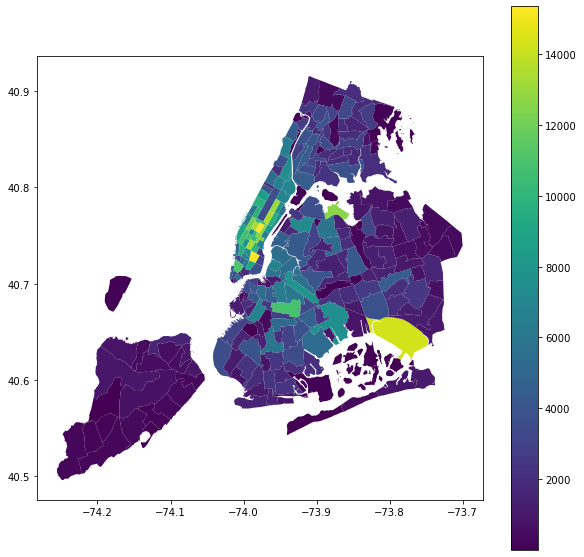

In [15]:
gdf_viz_before.plot(figsize=(10,10), column='trips', legend=True)

In [16]:
df_taxi_ly = pd.read_csv('results/taxi_pickup_ly.csv')
df_fhv_ly = pd.read_csv('results/fhv_pickup_ly.csv')

In [17]:
df_all_ly = pd.concat([df_taxi_ly, df_fhv_ly], axis=0)
df_all_ly.head()

,type,pu_month,pu_day,pu_hour,pulocationid,trips
0,green,3,1,0,100,1
1,green,3,1,0,106,2
2,green,3,1,0,112,11
3,green,3,1,0,116,7
4,green,3,1,0,119,1


In [18]:
df_all_ly.shape

(1640119, 6)

In [19]:
df_lockdown_ly = df_all_ly[((df_all_ly['pu_month'] == 3) & (df_all_ly['pu_day'] >= 25)) | ((df_all_ly['pu_month'] == 4) & (df_all_ly['pu_day'] <= 7))]
df_lockdown_ly.head()

,type,pu_month,pu_day,pu_hour,pulocationid,trips
63320,green,3,25,0,106,1
63321,green,3,25,0,112,6
63322,green,3,25,0,116,4
63323,green,3,25,0,119,1
63324,green,3,25,0,127,1


In [20]:
df_lockdown_agg_ly = df_lockdown_ly.groupby(['pulocationid']).agg({'trips': 'sum'})
df_lockdown_agg_ly['trips'] = df_lockdown_agg_ly['trips'] / 14
df_lockdown_agg_ly.rename(columns={'trips': 'trips_ly'}, inplace=True)
df_lockdown_agg_ly.head()

,trips_ly
pulocationid,
1,80.071429
2,0.857143
3,1445.000000
4,3713.071429
5,160.642857


In [21]:
gdf_viz = gdf_viz.merge(df_lockdown_agg_ly, left_on='location_i', right_on='pulocationid')
gdf_viz.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,trips,trips_ly
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",3.142857,80.071429
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",0.285714,0.857143
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",528.357143,1445.000000
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",382.142857,3713.071429
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",40.142857,160.642857


In [22]:
gdf_viz['yoy'] = gdf_viz['trips'] / gdf_viz['trips_ly'] - 1
gdf_viz.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,trips,trips_ly,yoy
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",3.142857,80.071429,-0.960749
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",0.285714,0.857143,-0.666667
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",528.357143,1445.000000,-0.634355
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",382.142857,3713.071429,-0.897082
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",40.142857,160.642857,-0.750111


<AxesSubplot:>

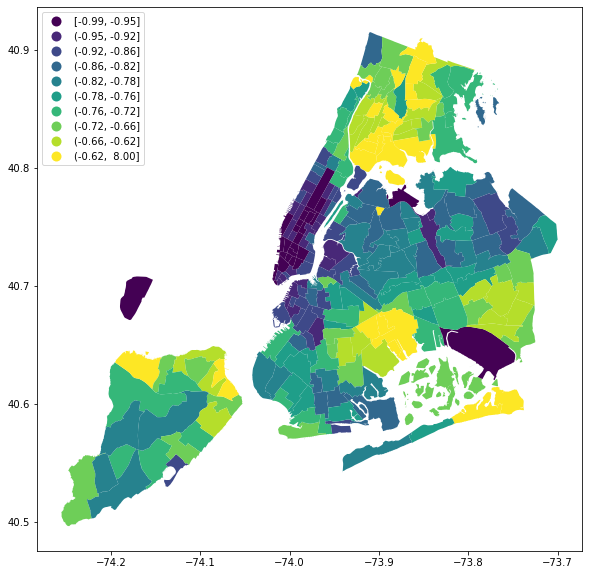

In [23]:
fig, ax = plt.subplots(1, figsize=(10,10))

gdf_viz.plot(ax=ax, column='yoy', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

<AxesSubplot:>

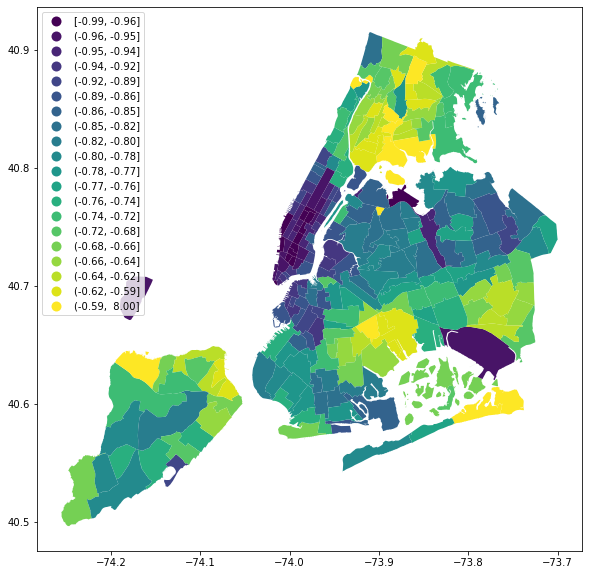

In [24]:
fig, ax = plt.subplots(1, figsize=(10,10))

gdf_viz.plot(ax=ax, column='yoy', k=20, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

In [29]:
gdf_viz.to_file('results/taxi_fhv/taxi_fhv_yoy.shp')